In [ ]:
# 引用需要的模組套件
import requests
import json
import pandas as pd
import time
import random
# 網路爬蟲設定
url = 'https://fund.megabank.com.tw/ETFData/djjson/ETNEWSjson.djjson?a=1&P1=mega&P2=&P3=true&P4=false&P5=false'
UserAgent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
headers = {
    'UserAgent' : UserAgent
}

res = requests.get(url=url, headers=headers)
time.sleep(random.uniform(1,3))

data = list()
for titleInfo in res.json()['ResultSet']['Result']:
    date = titleInfo['V1']
    title = titleInfo['V2']
    articleUrl = 'https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=' + titleInfo['V3']
    tmpDataDict = {
        '日期': date,
        '標題': title,
        '網址': articleUrl
    }
    data.append(tmpDataDict)

df = pd.DataFrame(data=data)
# df

In [ ]:
import os
import requests
import json
import pandas as pd
import time
import random
from bs4 import BeautifulSoup

# url = 'https://fund.megabank.com.tw/ETFData/djjson/ETNEWSjson.djjson?a=1&P1=mega&P2=&P3=true&P4=false&P5=false'
UserAgent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
headers = {
    'UserAgent' : UserAgent
}

res = requests.get(url=url, headers=headers)

if not os.path.exists('./articleFolder'):
    os.mkdir('./articleFolder')
    
for titleInfo in res.json()['ResultSet']['Result']:
    title = titleInfo['V2']
    articleUrl = 'https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=' + titleInfo['V3']
    resArticle = requests.get(url=articleUrl, headers=headers)
    soupArticle = BeautifulSoup(resArticle.text, 'html.parser')
    articleContent = soupArticle.select('td[class="NewsContent-Down"]')[0].text
#     print(articleContent)

    try:
        with open('./articleFolder/{}.txt'.format(title), 'w', encoding='utf-8') as f:
            f.write(articleContent)
    except FileNotFoundError:
        with open('./articleFolder/{}.txt'.format(title.replace('/', '')), 'w', encoding='utf-8') as f:
            f.write(articleContent)
    except OSError:
        pass
#     print('===========')
    time.sleep(random.uniform(1,5))


In [2]:
import jieba
import glob

def isContained(orgStr, subStrList):
    for subStr in subStrList:
        if subStr in orgStr:
            return True
    return False

sb = ''
for articleFilePath in glob.glob('./articleFolder/*.txt'):
    with open(articleFilePath, 'r', encoding='utf-8') as f:
        sb += f.read()

jieba.load_userdict('./mydict.txt')
stopWords = [' ', '、', '(', ')', '...', '＂','"', '「', '」', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
wordCutList = [w for w in jieba.cut(sb)]

wordCountDict = dict()
for w in wordCutList:
    if w.__len__() > 1 and not isContained(w, stopWords):
        if w in wordCountDict:
            wordCountDict[w] += 1
        else:
            wordCountDict[w] = 1

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Jeffery\AppData\Local\Temp\jieba.cache
Loading model cost 0.381 seconds.
Prefix dict has been built successfully.


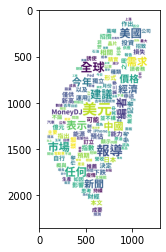

In [6]:
import matplotlib.pyplot as plt
import wordcloud
import numpy
from PIL import Image

# 字體設定
font_path = 'TaipeiSansTCBeta-Bold.ttf'
# 圖片轉陣列
mask = numpy.array(Image.open('taiwan.jpg'))

wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         mask=mask, # 遮罩
                         font_path=font_path,
                         max_words=150, # 取多少文字在裡面
                         width=874, height=516, # 長寬解析度
                         )
wc.generate_from_frequencies(wordCountDict)

wc.to_file('myWordCloud.png')

plt.imshow(wc)